In [43]:
import pandas as pd

In [44]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [45]:
data = pd.read_csv("~/Desktop/all/project/machine learning/bank-additional/bank-additional-full.csv", sep= ";")

In [46]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
df = pd.DataFrame(data=data)

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [49]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [51]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [52]:
df.ftypes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.ftypes is deprecated and will be removed in a future version. Use DataFrame.dtypes instead.
  """Entry point for launching an IPython kernel.


age                 int64:dense
job                object:dense
marital            object:dense
education          object:dense
default            object:dense
housing            object:dense
loan               object:dense
contact            object:dense
month              object:dense
day_of_week        object:dense
duration            int64:dense
campaign            int64:dense
pdays               int64:dense
previous            int64:dense
poutcome           object:dense
emp.var.rate      float64:dense
cons.price.idx    float64:dense
cons.conf.idx     float64:dense
euribor3m         float64:dense
nr.employed       float64:dense
y                  object:dense
dtype: object

In [53]:
df.get_dtype_counts()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64     5
int64       5
object     11
dtype: int64

In [54]:
df.values

array([[56, 'housemaid', 'married', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'married', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'married', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'married', ..., 1.028, 4963.6, 'no']], dtype=object)

In [55]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [56]:
l = df.columns.values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [58]:
df.groupby(['age']).count()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,,
17,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
18,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
19,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
20,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
21,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
92,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
94,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [59]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [60]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [61]:
df['marital'].value_counts(dropna = False)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [62]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [63]:
def missing_values(x):
    return sum(x.isnull())
df.apply(missing_values, axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
df.apply(pd.value_counts)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
-50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN
-50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,282.0,NaN,NaN,NaN
-49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN
-47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2458.0,NaN,NaN,NaN
-46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5794.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unemployed,NaN,1014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
university.degree,NaN,NaN,NaN,12168.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,NaN,330.0,80.0,1731.0,8597.0,990.0,990.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df = df.drop(['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', ],axis=1)

In [68]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [69]:
# club jobs 
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services','housemaid'], 'low-wage')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed',], 'non-working')

In [70]:
df.job.value_counts()

white-collar     13346
blue-collar       9254
technician        6743
low-wage          5029
non-working       3609
entrepreneur      1456
self-employed     1421
unknown            330
Name: job, dtype: int64

In [71]:
# club education 
df['education'] = df['education'].replace(['basic.4y','basic.6y','basic.9y'], 'elementary')
df['education'] = df['education'].replace(['professional.course','university.degree'], 'graduate')


In [72]:
df.education.value_counts()

graduate       17411
elementary     12513
high.school     9515
unknown         1731
illiterate        18
Name: education, dtype: int64

In [73]:
df = df.drop(df[(df.job == 'unknown')].index)

In [74]:
print("Jobs")
df.job.value_counts()

Jobs


white-collar     13346
blue-collar       9254
technician        6743
low-wage          5029
non-working       3609
entrepreneur      1456
self-employed     1421
Name: job, dtype: int64

In [75]:
df = df.drop(df[(df.marital == 'unknown')].index)

In [76]:
df.marital.value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

In [77]:
df = df.drop(df[(df.education == 'unknown')].index)

In [78]:
print("Maritial Status")
df.marital.value_counts()

Maritial Status


married     23748
single      11026
divorced     4417
Name: marital, dtype: int64

In [79]:
df = df.drop(df[(df.default == 'unknown')].index)

In [80]:
df.default.value_counts()

no     31224
yes        3
Name: default, dtype: int64

In [81]:
df = df.drop(df[(df.housing == 'unknown')].index)

In [82]:
print("Housing")
df.housing.value_counts()

Housing


yes    16521
no     13967
Name: housing, dtype: int64

In [83]:
df = df.drop(df[(df.loan == 'unknown')].index)

In [84]:
df.loan.value_counts()

no     25720
yes     4768
Name: loan, dtype: int64

In [86]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,0.007910,-0.002364,-0.050891,0.049231
duration,0.007910,1.000000,-0.068406,-0.046239,0.018772
campaign,-0.002364,-0.068406,1.000000,0.054312,-0.080766
pdays,-0.050891,-0.046239,0.054312,1.000000,-0.590248
previous,0.049231,0.018772,-0.080766,-0.590248,1.000000


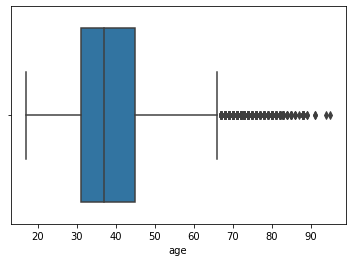

In [87]:
g = sns.boxplot(df.age)

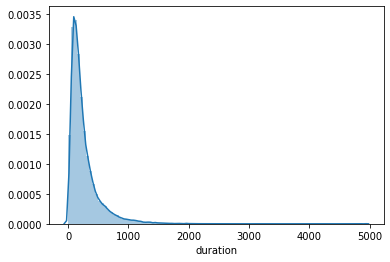

In [88]:
sns.distplot(df.duration, bins=100)

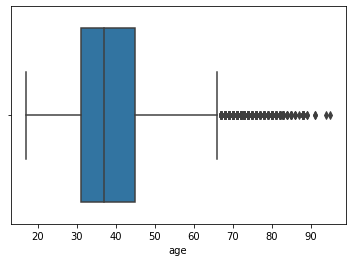

In [89]:
g = sns.boxplot(df.age)

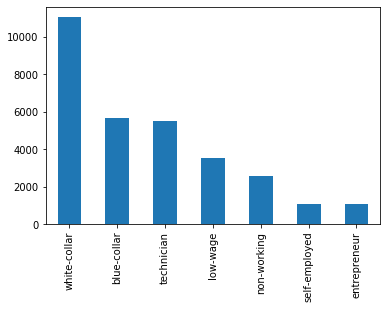

In [90]:
df['job'].value_counts().plot(kind="bar")

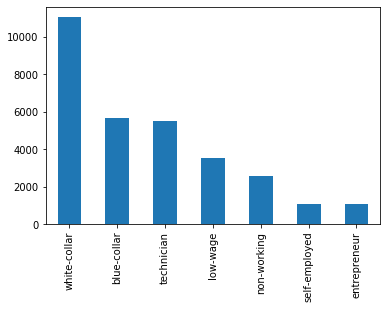

In [91]:
df['job'].value_counts().plot(kind="bar")

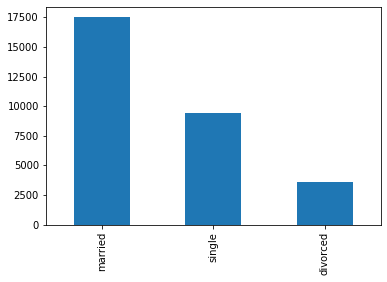

In [92]:
df['marital'].value_counts().plot(kind="bar")

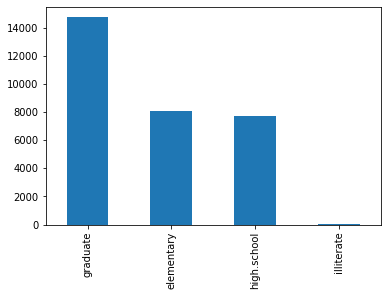

In [93]:
df['education'].value_counts().plot(kind="bar")

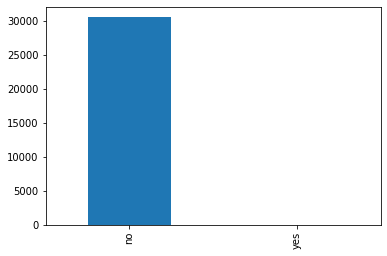

In [94]:
df['default'].value_counts().plot(kind="bar")

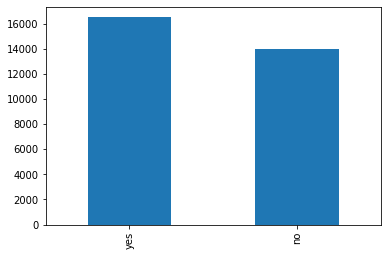

In [95]:
df['housing'].value_counts().plot(kind="bar")

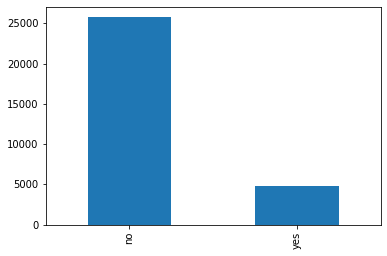

In [96]:
df['loan'].value_counts().plot(kind="bar")

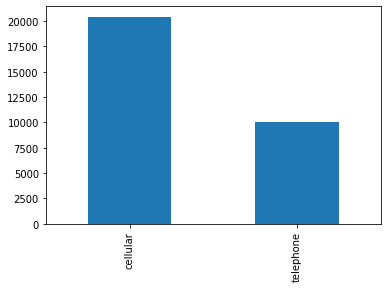

In [97]:
df['contact'].value_counts().plot(kind="bar")

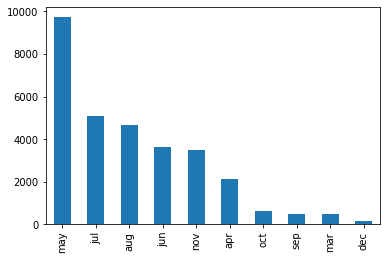

In [98]:
df['month'].value_counts().plot(kind="bar")

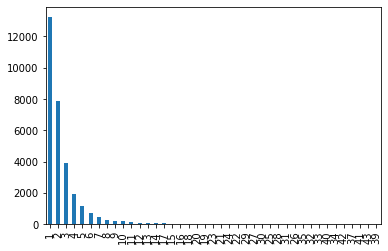

In [99]:
df['campaign'].value_counts().plot(kind="bar")

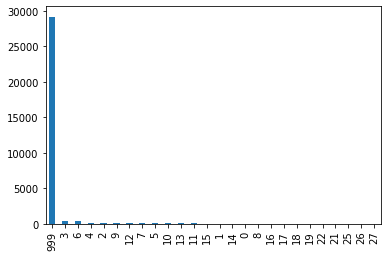

In [100]:
df['pdays'].value_counts().plot(kind="bar")

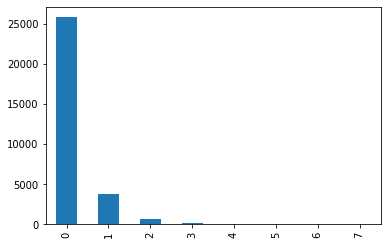

In [101]:
df['previous'].value_counts().plot(kind="bar")

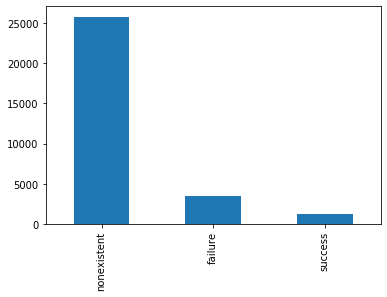

In [102]:
df['poutcome'].value_counts().plot(kind="bar")

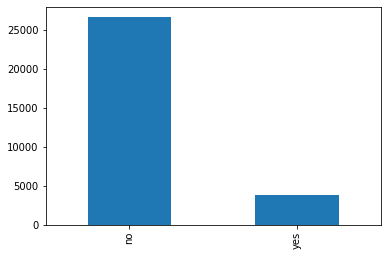

In [103]:
df['y'].value_counts().plot(kind="bar")

In [104]:
# if last contact with the person is after many days make it less relevend
df['pday'] = np.where(df.pdays == 999 , 0 , np.round(1/df.pdays, decimals =2))



In [105]:
df = df.drop(['pdays', 'contact'], axis =1)

In [106]:
np.where(np.isnan(df.pday))

(array([], dtype=int64),)

In [107]:
df = df[np.isfinite(df.pday)]

In [108]:
np.where(np.isinf(df.pday))

(array([], dtype=int64),)

In [109]:
np.where(np.isnan(df.duration))

(array([], dtype=int64),)

In [110]:
df_new = df

In [111]:
# recheck if there is no nul value
def missing_values(x):
    return sum(x.isnull())
df.apply(missing_values, axis=0)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
pday           0
dtype: int64

In [112]:
# values for "loan" : yes/no
df_new["loan_df"]=df_new['loan'].map({'yes':1, 'no':0})
df_new.drop('loan', axis=1,inplace = True)
df_new.loan_df.value_counts()

0    25709
1     4765
Name: loan_df, dtype: int64

In [113]:
# values for "housing" : yes/no
df_new["housing_df"]=df_new['housing'].map({'yes':1, 'no':0})
df_new.drop('housing', axis=1,inplace = True)
df_new.housing_df.value_counts()

1    16508
0    13966
Name: housing_df, dtype: int64

In [114]:
# values for "default" : yes/no
df_new["default_df"]=df_new['default'].map({'yes':1, 'no':0})
df_new.drop('default', axis=1,inplace = True)
df_new.default_df.value_counts()

0    30471
1        3
Name: default_df, dtype: int64

In [115]:
# values for "y" : yes/no
df_new["y_df"]=df_new['y'].map({'yes':1, 'no':0})
df_new.drop('y', axis=1,inplace = True)
df_new.y_df.value_counts()

0    26625
1     3849
Name: y_df, dtype: int64

In [116]:
df_new[0:20]

,age,job,marital,education,month,day_of_week,duration,campaign,previous,poutcome,pday,loan_df,housing_df,default_df,y_df
0,56,low-wage,married,elementary,may,mon,261,1,0,nonexistent,0.0,0,0,0,0
2,37,low-wage,married,high.school,may,mon,226,1,0,nonexistent,0.0,0,1,0,0
3,40,white-collar,married,elementary,may,mon,151,1,0,nonexistent,0.0,0,0,0,0
4,56,low-wage,married,high.school,may,mon,307,1,0,nonexistent,0.0,1,0,0,0
6,59,white-collar,married,graduate,may,mon,139,1,0,nonexistent,0.0,0,0,0,0
8,24,technician,single,graduate,may,mon,380,1,0,nonexistent,0.0,0,1,0,0
9,25,low-wage,single,high.school,may,mon,50,1,0,nonexistent,0.0,0,1,0,0
11,25,low-wage,single,high.school,may,mon,222,1,0,nonexistent,0.0,0,1,0,0
12,29,blue-collar,single,high.school,may,mon,137,1,0,nonexistent,0.0,1,0,0,0
13,57,low-wage,divorced,elementary,may,mon,293,1,0,nonexistent,0.0,0,1,0,0


In [117]:
#one_hot = ['job', 'marital','education', 'contact', 'month','day_of_week','poutcome']

bank = pd.get_dummies(data=df_new, columns = ['job', 'marital','education','poutcome'], \
                                   prefix = ['job', 'marital','education', 'poutcome'])


In [118]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30474 entries, 0 to 41187
Data columns (total 28 columns):
age                      30474 non-null int64
month                    30474 non-null object
day_of_week              30474 non-null object
duration                 30474 non-null int64
campaign                 30474 non-null int64
previous                 30474 non-null int64
pday                     30474 non-null float64
loan_df                  30474 non-null int64
housing_df               30474 non-null int64
default_df               30474 non-null int64
y_df                     30474 non-null int64
job_blue-collar          30474 non-null uint8
job_entrepreneur         30474 non-null uint8
job_low-wage             30474 non-null uint8
job_non-working          30474 non-null uint8
job_self-employed        30474 non-null uint8
job_technician           30474 non-null uint8
job_white-collar         30474 non-null uint8
marital_divorced         30474 non-null uint8
marital_marri

In [119]:
bank = bank.drop(['month', 'day_of_week'], axis=1)

In [120]:
# dataframe after one-hot encoding
bank

,age,duration,campaign,previous,pday,loan_df,housing_df,default_df,y_df,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_elementary,education_graduate,education_high.school,education_illiterate,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0.0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,37,226,1,0,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,40,151,1,0,0.0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,56,307,1,0,0.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,59,139,1,0,0.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
41184,46,383,1,0,0.0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
41185,56,189,2,0,0.0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
41186,44,442,1,0,0.0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE


#Algorithms

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
#import graphviz
#import pydot

#Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#import xgboost as xgb
#from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

In [123]:
X = bank.loc[:, bank.columns != 'y_df']
Y = bank.loc[:, bank.columns == 'y_df']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [125]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())

y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

cm_rf = confusion_matrix(y_test, y_pred)
print("Report Entropy:")
print(classification_report(y_test, y_pred))

print(cm_rf)

0.8795800065623974
99.96 %
Report Entropy:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7947
           1       0.57      0.33      0.42      1196

    accuracy                           0.88      9143
   macro avg       0.74      0.65      0.68      9143
weighted avg       0.86      0.88      0.87      9143

[[7643  304]
 [ 797  399]]


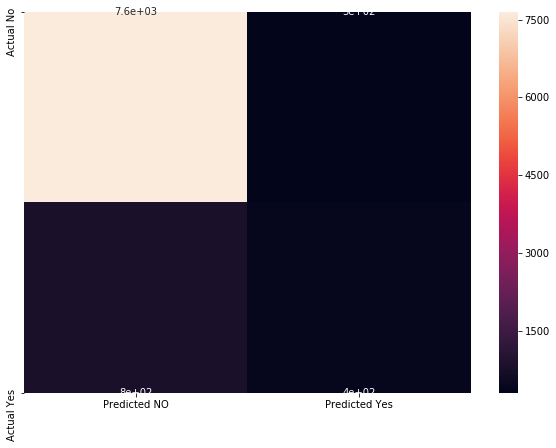

In [126]:
df_rf = pd.DataFrame(cm_rf, index = ['Actual No', 'Actual Yes'],
                  columns = ['Predicted NO', 'Predicted Yes'])
plt.figure(figsize = (10,7))
sns.heatmap(df_rf, annot=True)

In [127]:
preds = random_forest.predict_proba(X_train)[:,1]

In [129]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [130]:
deciling(y_train,['DECILE'],'TARGET','NONTARGET')

NameError: name 'deciling' is not defined

In [131]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

NameError: name 'gains' is not defined

In [132]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=100, max_features=3, n_jobs=-1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

NameError: name 'model_selection' is not defined

In [133]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_)
y_pred = logreg.predict(X_test)
print(logreg.get_params())
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm_lr = confusion_matrix(y_test, y_pred)
print("Report Entropy:")
print(classification_report(y_test, y_pred))
print(cm_lr)
logreg.sparsify()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.0051933   0.00390332 -0.11380076  0.33825194  0.23196244 -0.13383659
   0.06724455 -0.00263388 -0.728802   -0.24968716 -0.41708756  0.72374169
  -0.11846708 -0.34444698 -0.13239266 -0.5242026  -0.49860244 -0.2443367
  -0.4662333  -0.31919557 -0.48903206  0.00731918 -1.12367768 -1.23716219
   1.09369813]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Report Entropy:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7947
           1       0.67      0.33      0.44      1196

    accuracy                           0.89      9143
   macro avg       0.79      0.65      0.69      9143
weighted avg       0.87      0.89      0.87      9143

[[7753  194]
 [ 807  389]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
coeff = pd.DataFrame(X_train.columns, )

In [137]:
coeff

,0
0,age
1,duration
2,campaign
3,previous
4,pday
5,loan_df
6,housing_df
7,default_df
8,job_blue-collar
9,job_entrepreneur


In [148]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [149]:
coefficients

,0,0
0,age,"(0, 0)\t0.005193299796974428"
1,duration,"(0, 0)\t0.003903320456585995"
2,campaign,"(0, 0)\t-0.11380075906276246"
3,previous,"(0, 0)\t0.33825194224201305"
4,pday,"(0, 0)\t0.23196243626996357"
5,loan_df,"(0, 0)\t-0.13383658545387872"
6,housing_df,"(0, 0)\t0.06724454776820603"
7,default_df,"(0, 0)\t-0.0026338797695823367"
8,job_blue-collar,"(0, 0)\t-0.728802004457257"
9,job_entrepreneur,"(0, 0)\t-0.2496871604342469"


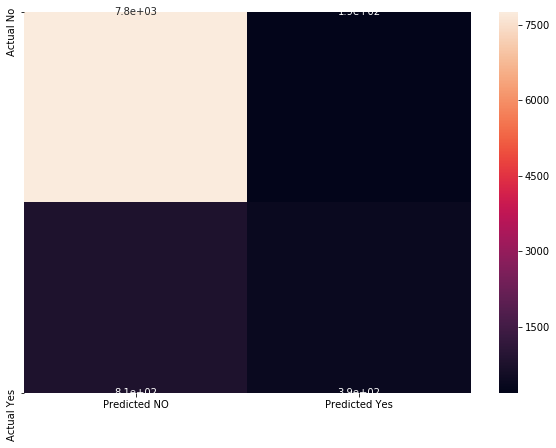

In [150]:
df_lr = pd.DataFrame(cm_lr, index = ['Actual No', 'Actual Yes'],
                  columns = ['Predicted NO', 'Predicted Yes'])
plt.figure(figsize = (10,7))
sns.heatmap(df_lr, annot=True)

In [151]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

cm_dt = confusion_matrix(y_test, y_pred)
print("Report Entropy: ", classification_report(y_test, y_pred))
print(cm_dt)

99.96 %
Report Entropy:                precision    recall  f1-score   support

           0       0.91      0.91      0.91      7947
           1       0.39      0.39      0.39      1196

    accuracy                           0.84      9143
   macro avg       0.65      0.65      0.65      9143
weighted avg       0.84      0.84      0.84      9143

[[7209  738]
 [ 734  462]]


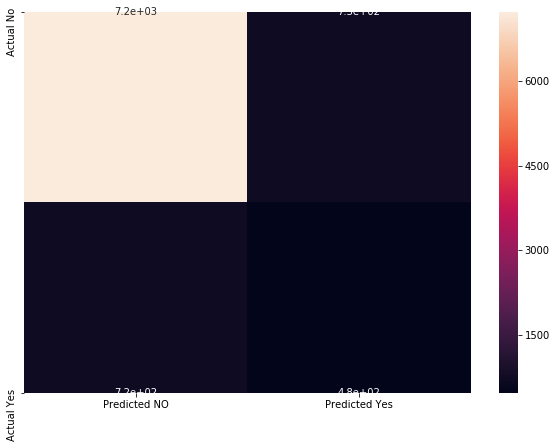

In [141]:
df_dt = pd.DataFrame(cm_dt, index = ['Actual No', 'Actual Yes'],
                  columns = ['Predicted NO', 'Predicted Yes'])
plt.figure(figsize = (10,7))
sns.heatmap(df_dt, annot=True)